In [1]:
import astropy.io.fits as pf
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 12]

%matplotlib nbagg

### Abertura dos arquivos
"The `open()` function returns an object called an HDUList which is a list-like collection of HDU objects. An HDU (Header Data Unit) is the highest level component of the FITS file structure, consisting of a header and (typically) a data array or table."

O arquivo tem um header com chaves que especificam seu conteúdo.

In [4]:
obs_path = 'spectra/HD110379/obs_HD110379_ordens_finalglue.fits'
tel_path = 'spectra/HD110379/tellstar_qvir_ordens_finalglue.fits'

In [5]:
with pf.open(obs_path) as spectrum_obs:
    spectrum_obs.info()
    primary_hdu = spectrum_obs[0]

Filename: spectra/HD110379/obs_HD110379_ordens_finalglue.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     539   (595493,)   float64   


In [13]:
pf.getheader(obs_path)['CRVAL1']

3052.0

In [10]:
spec_data = pf.getdata(obs_path)
spec_data.shape

(595493,)

In [12]:
ftfile = pf.open(obs_path)

In [87]:
wl_i = ftfile[0].header['CRVAL1']
wl_step = ftfile[0].header['CDELT1']
wavelength = np.arange(spec_data.size)*wl_step+wl_i      # wavelength

In [88]:
wl_max = wavelength.max()
wl_min = wavelength.min()
flx_max = spec_data.max()
flx_min = spec_data.min()

### Seguindo exemplo do notebook da Malu

In [89]:
import scipy.interpolate as interp

In [90]:
my_step = 0.05

In [91]:
interpolation_function = interp.interp1d(wavelength, spec_data)

In [92]:
new_wavelength = np.arange(start=wl_min,  stop=wl_max, step=my_step)

In [93]:
new_flux = np.arange(start=flx_min, stop=flx_max)
new_flux = interpolation_function(new_wavelength)

<IPython.core.display.Javascript object>


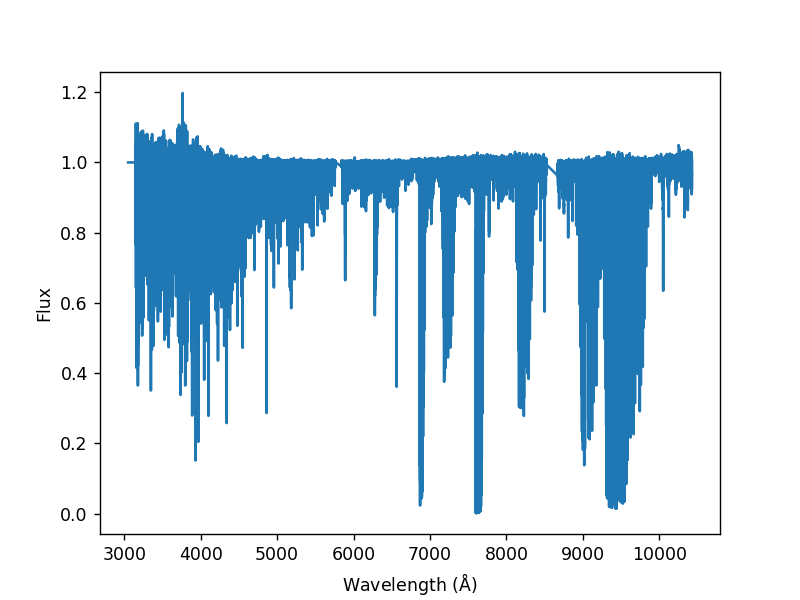

In [114]:
plt.plot(new_wavelength, new_flux, '-')
plt.xlabel(r"Wavelength ($\mathrm{\AA}$)")
plt.ylabel(r"Flux")
plt.show()

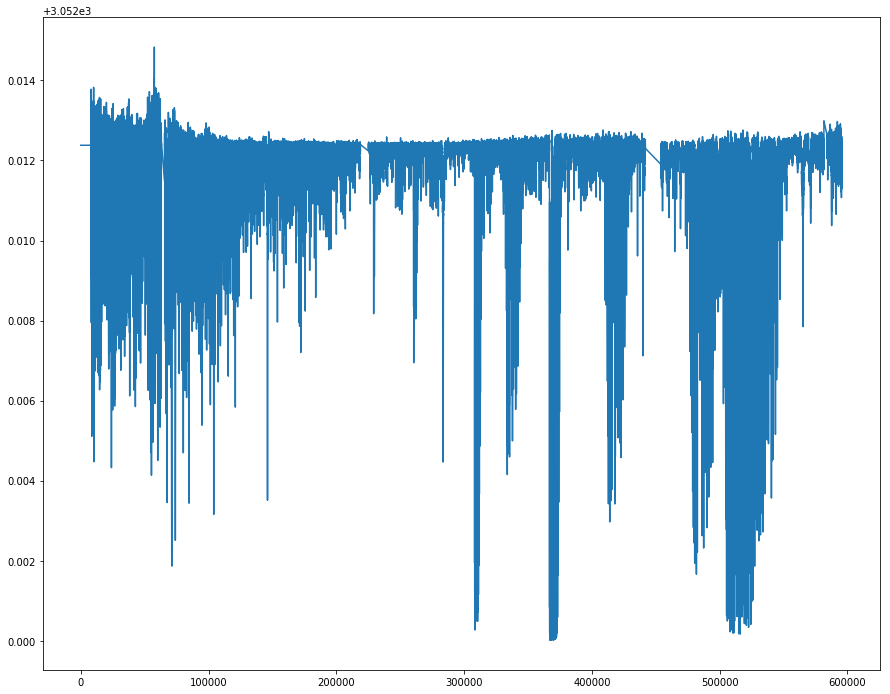

In [107]:
with pf.open(obs_path) as hdu:
    data = hdu[0].data
    hdr = hdu[0].header #added to try2
    step = hdr['CDELT1'] #added to try2
    restw = hdr['CRVAL1'] #added to try2
    spectra = restw + (data * step) #added to try
    
    plt.plot(spectra)
    plt.show()

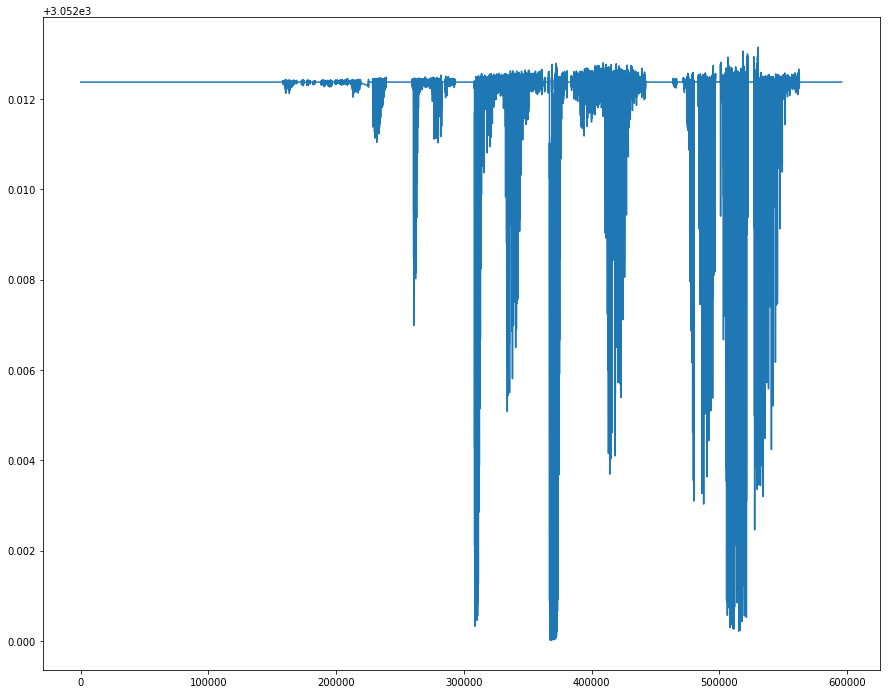

In [112]:
with pf.open(tel_path) as hdu:
    data = hdu[0].data
    hdr = hdu[0].header #added to try2
    step = hdr['CDELT1'] #added to try2
    restw = hdr['CRVAL1'] #added to try2
    spectra = restw + (data * step) #added to try
    
    plt.plot(spectra)
    plt.show()